<a href="https://colab.research.google.com/github/Mansi67/Global_Terrorism_Dataset_EDA/blob/main/Global_Terrorism_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Global Terrorism Database(GTD) EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**          - Mansi Srivastava


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

# **Problem Statement**


#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [4]:
# Load Dataset
df=pd.read_csv("/content/Global_Terrorism_Data.csv", encoding = "ISO-8859-1")

<ipython-input-4-264307a984f3>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Global_Terrorism_Data.csv", encoding = "ISO-8859-1")


### Dataset First View

In [3]:
# Dataset First Look
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [4]:
df.tail(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(181691, 135)

Dataset has 1,81,691 rows and 135 columns

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [7]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City',
                       'region_txt':'Region','attacktype1_txt':'Attack_Type','nkill':'Killed',
                       'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                   'weaptype1_txt':'Weapon_Type','motive':'Motive', 'property':'Property_Damages',
                   'propextent_txt':'PropDamageExtent','weapsubtype1_txt':'Weapon_Subtype'},inplace=True)

In [8]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['eventid','Year','Month','Day','Country','State','City','Region','latitude','longitude','specificity','Attack_Type','success','Killed',
               'Wounded','extended','Target_Type','suicide','Weapon_Type','Weapon_Subtype','Group','nperps','Motive','Property_Damages',
         'PropDamageExtent']]

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   Day               181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   State             181270 non-null  object 
 6   City              181257 non-null  object 
 7   Region            181691 non-null  object 
 8   latitude          177135 non-null  float64
 9   longitude         177134 non-null  float64
 10  specificity       181685 non-null  float64
 11  Attack_Type       181691 non-null  object 
 12  success           181691 non-null  int64  
 13  Killed            171378 non-null  float64
 14  Wounded           165380 non-null  float64
 15  extended          181691 non-null  int64  
 16  Target_Type       18

There are 6 float, 8 int and 11 object columns

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There are zero duplicate rows in the dataset

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().any()

eventid             False
Year                False
Month               False
Day                 False
Country             False
State                True
City                 True
Region              False
latitude             True
longitude            True
specificity          True
Attack_Type         False
success             False
Killed               True
Wounded              True
extended            False
Target_Type         False
suicide             False
Weapon_Type         False
Weapon_Subtype       True
Group               False
nperps               True
Motive               True
Property_Damages    False
PropDamageExtent     True
dtype: bool

In [13]:
# No of columns with missing values

len([col for col in df.columns if df[col].isnull().any()])

11

In [14]:
#Print the number of null values in each column
df.isnull().sum()


eventid                  0
Year                     0
Month                    0
Day                      0
Country                  0
State                  421
City                   434
Region                   0
latitude              4556
longitude             4557
specificity              6
Attack_Type              0
success                  0
Killed               10313
Wounded              16311
extended                 0
Target_Type              0
suicide                  0
Weapon_Type              0
Weapon_Subtype       20768
Group                    0
nperps               71115
Motive              131130
Property_Damages         0
PropDamageExtent    117626
dtype: int64

In [15]:
#Percentage of missing values in each column
data=round((1 - df.count() / len(df))*100,2)
df_missing = pd.DataFrame({'Column':data.index, '%Missing':data.values},index=None)

df_missing

,Column,%Missing
0,eventid,0.00
1,Year,0.00
2,Month,0.00
3,Day,0.00
4,Country,0.00
5,State,0.23
6,City,0.24
7,Region,0.00
8,latitude,2.51
9,longitude,2.51


<Axes: >

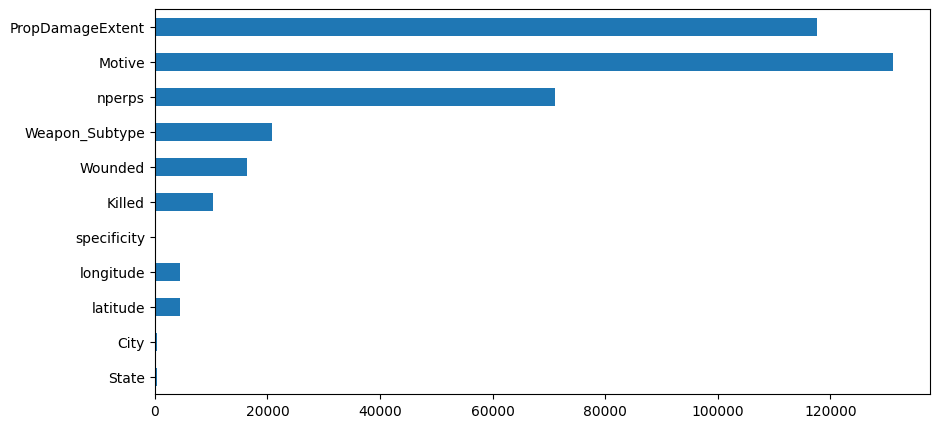

In [16]:
# Visualizing the missing values
plot_width, plot_height = (10,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
df.isna().sum()[df.isna().sum()>0].plot(kind='barh')


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
# Dataset Describe
df.describe()

,eventid,Year,Month,Day,latitude,longitude,specificity,success,Killed,Wounded,extended,suicide,nperps,Property_Damages
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,171378.000000,165380.000000,181691.000000,181691.000000,110576.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,1.451452,0.889598,2.403272,3.167668,0.045346,0.036507,-65.361154,-0.544556
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.995430,0.313391,11.545741,35.949392,0.208063,0.187549,216.536633,3.122889
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,5.000000,1.000000,1570.000000,8191.000000,1.000000,1.000000,25000.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart - 1: **No. of Attacks Per Year**

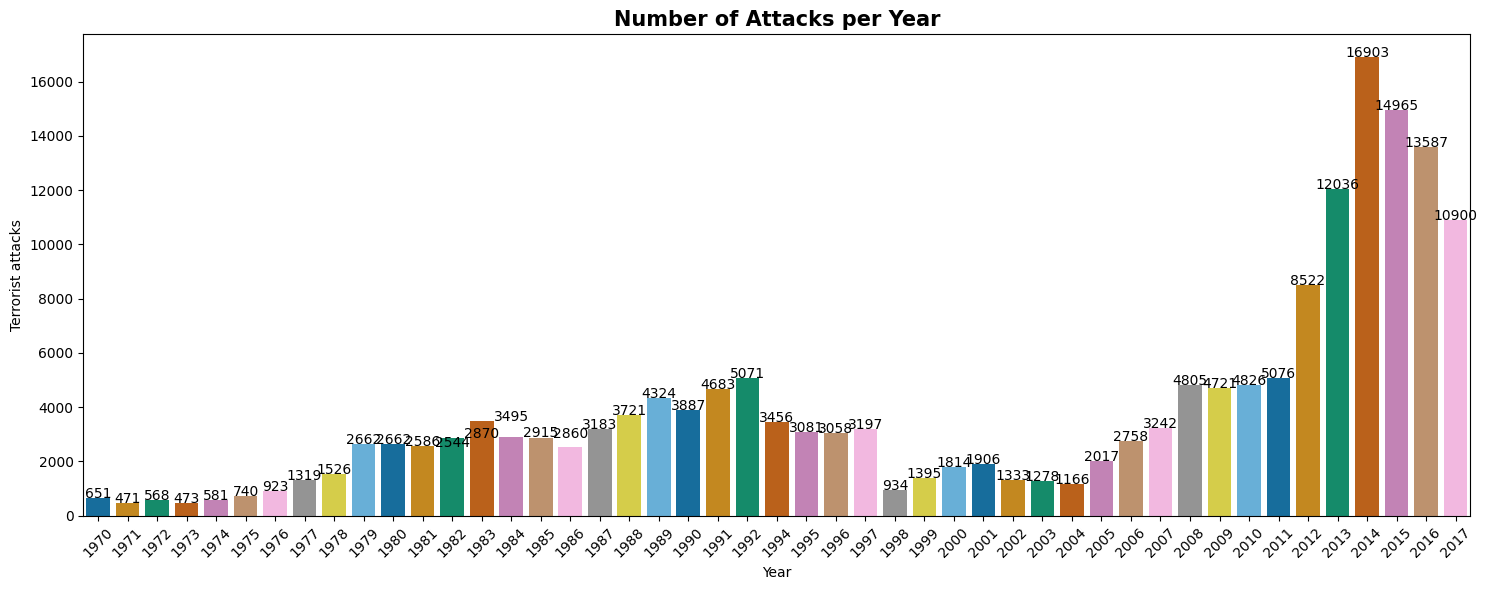

In [10]:
#Finding unique years in the dataset
x_year = df['Year'].unique()
#Count of attacks per year
y_count_years = df['Year'].value_counts(dropna = False).sort_index()

#Plot the barplot
plt.figure(figsize = (15,6)) #Fig size
ax=sns.barplot(x = x_year,
           y = y_count_years,palette='colorblind')
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Terrorist attacks')
plt.title('Number of Attacks per Year',fontsize = 15, fontweight="bold")

#Show number of attacks on top of bars
for i, v in enumerate(y_count_years):
   ax.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot makes it easy to visualize the complex data at a glance. This plot is meant to understand the distribution of the total terrorist attacks in the last 05 decades.

##### 2. What is/are the insight(s) found from the chart?

 Analyzing terrorist attacks per year helps in understanding temporal trends and patterns. The graphs shows a linear increase in number of attacks as years progess. The number of attacks significantly dropped after 1997 and remained less for a couple of years up until 2007. There were a large number of attacks across the world between 2012 and 2017. The year 2014 was worst year in terms of peace.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights gained from analyzing terrorist attacks per year can inform strategic decision-making, risk management strategies, and preparedness plans. This, in turn, can contribute to a more resilient business environment and indirectly influence positive business outcomes.

# **Chart - 2 : Region Vs Attacks**

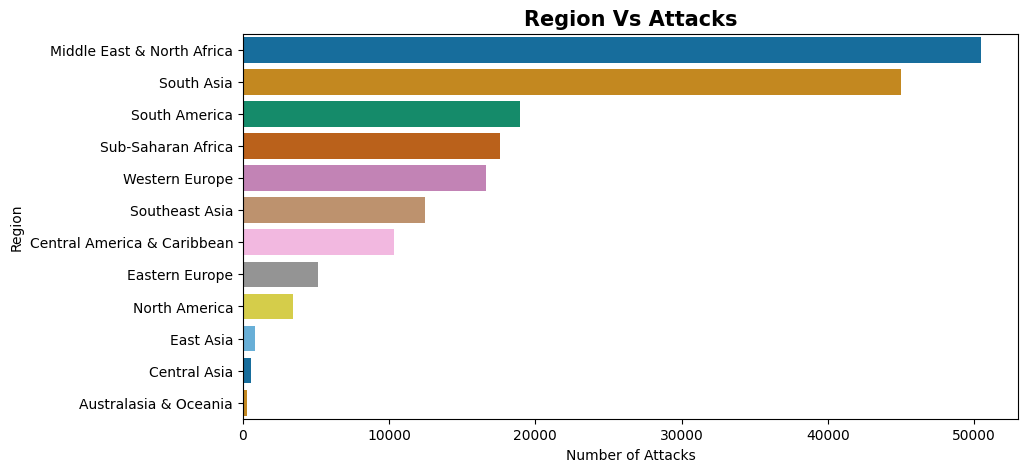

In [18]:
#Group dataframe by region, count number of attacks, sort by region with most number of attacks
x=df.groupby("Region")['eventid'].count().sort_values(ascending=False)

#Plot the bargraph
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Region')
plt.xlabel('Number of Attacks')
plt.title('Region Vs Attacks',fontsize=15,fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

This chart identifies regions that are more prone to terrorist attacks. Understanding these trends helps in developing region-specific strategies to counter terrorism or address root causes contributing to conflict.

##### 2. What is/are the insight(s) found from the chart?

This chart divides the world in 12 regions.

Middle East & North African and South Asian regions experience highest number of terrorist attacks.
East Asia, Australasia & Oceania and Central Asian regions are rather peaceful regions.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 For global businesses and diplomatic relations, understanding regional attack patterns fosters a deeper comprehension of geopolitical risks. It influences decisions related to investment, trade, and international partnerships.

# **Chart 3 - Most Targeted Countries**

In [12]:
pip install squarify

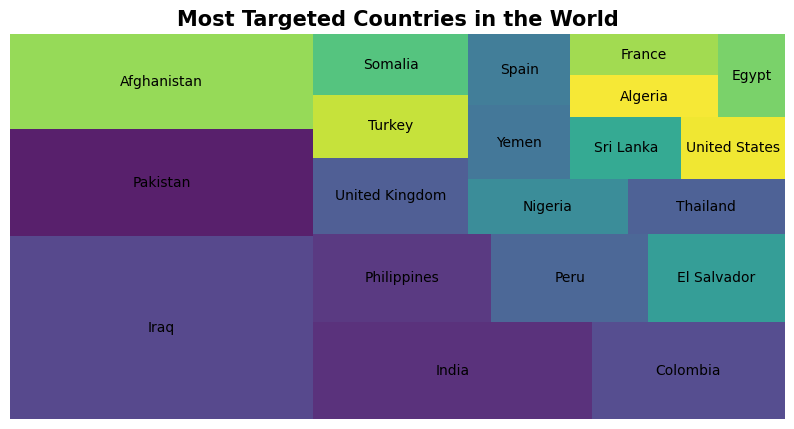

In [20]:
import squarify
# 20 Most Targeted Countries
s=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:20]

# Plotting the treemap
plt.figure(figsize=(10, 5))
squarify.plot(sizes=s.values.tolist(), label=s.index.tolist(), alpha=0.9)
plt.axis('off')  # Remove axis
plt.title('Most Targeted Countries in the World', fontweight='bold', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

The visual representation in a treemap is intuitive and easily interpretable. Users can quickly identify larger rectangles (representing countries with higher incidents) and compare them to smaller rectangles (representing countries with fewer incidents).

##### 2. What is/are the insight(s) found from the chart?

Iraq, Pakistan, Afghanistan, India, Colombia are the countries where most attacks have occured till 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While insights into the most targeted countries provide valuable information for risk management and decision-making, they can also lead to negative growth or adverse effects due to operational disruptions, increased costs, reduced consumer confidence, and challenges in investment and market expansion.

# **Chart - 4 : Most Targeted Countries in Each Region**

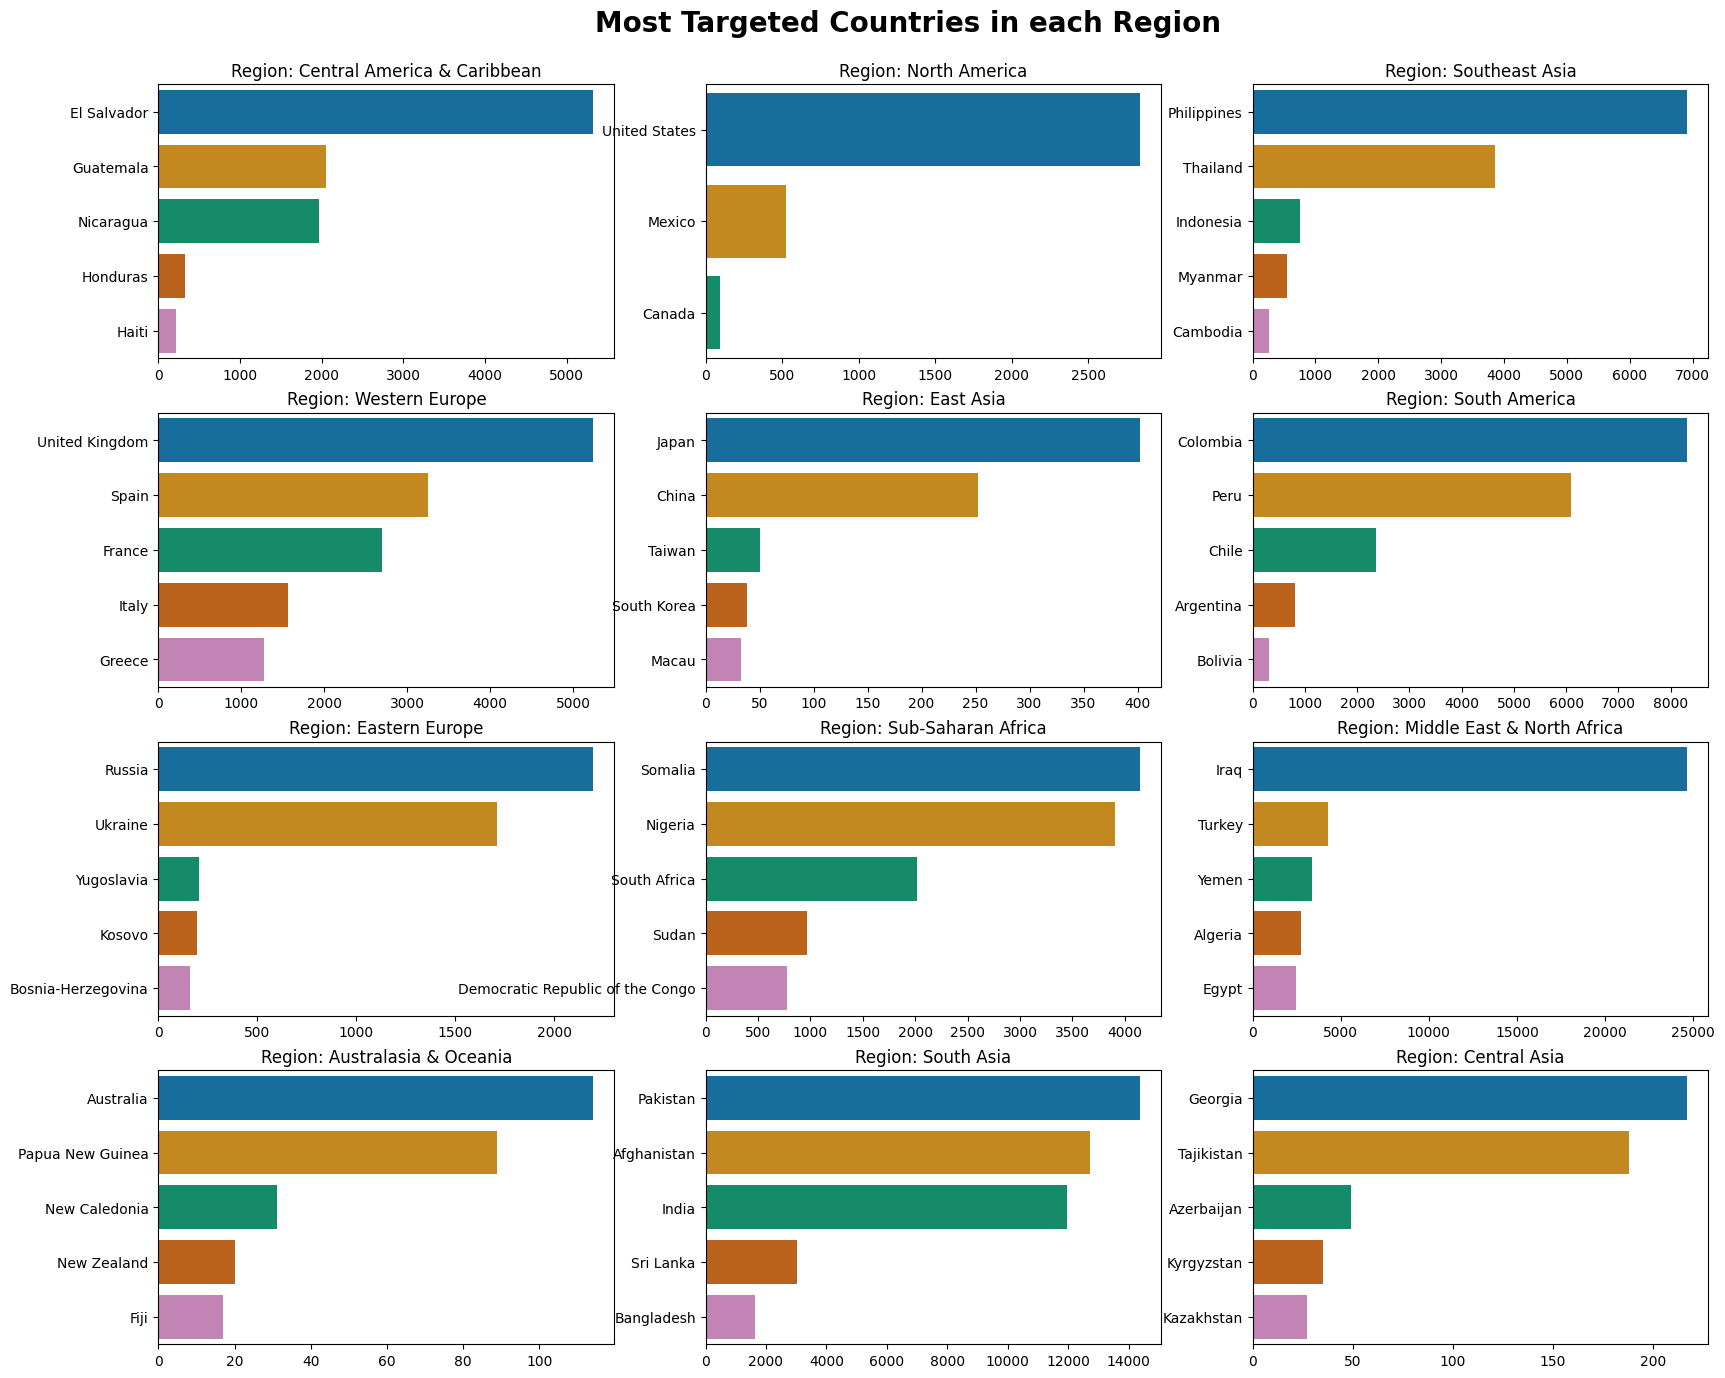

In [19]:
# Create a 4x3 grid of subplots for graphs
fig, axes = plt.subplots(4, 3, figsize=(20,15))
# Adjust space of subplots
fig.subplots_adjust(top=0.95)
# Title of the main graph
plt.suptitle("Most Targeted Countries in each Region",  fontsize = 20, fontweight="bold",y=1)
i=0
j=0
flag=0
for value in df['Region'].unique():
  x=df[df['Region']==value].groupby('Country')['eventid'].count().sort_values(ascending=False)[0:5] # Top 5 most targeted countries by region

  # Plot subplots for each region
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Region: {}'.format(value),ylabel=None)
  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0

plt.show()



##### 1. Why did you pick the specific chart?

Highlighting the countries with the highest number of attacks in each region helps identify specific regional hotspots for terrorist activities. This information helps in prioritizing resources and counter-terrorism efforts in those areas.

##### 2. What is/are the insight(s) found from the chart?

Iraq has suffered most of the terrorist attacks in Middle East & North African region as well as in the whole world till 2017.
In South Asian region, Pakistan, Afghanistan and India tops the chart.
In Eastern Europe- Russia and Ukraine are the countries with most attacks.
In North America, USA tops and so on.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For multinational corporations and businesses, being associated with countries affected by terrorism may impact brand perception.
Businesses may face legal and compliance challenges due to the complex regulatory environments in high-risk regions, leading to additional costs and operational constraints.

# **Chart - 5 : Number of Attacks in Each Region Decadewise**

In [21]:
#Function to calculate decade
def decade(year):
    if year>=1970 and year<1980:
       result='1970-1980'
    elif year>=1980 and year<1990:
       result= '1980-1990'
    elif year>=1990 and year<2000:
      result= '1990-2000'
    elif year>=2000 and year<2010:
       result= '2000-2010'
    else:
       result= '2010-2017'
    return result

In [23]:
# Create a new column 'decade'
df['decade']=df['Year'].apply(decade)

<ipython-input-23-6b6f9263676a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade']=df['Year'].apply(decade)


In [24]:
df.sample(2)

,eventid,Year,Month,Day,Country,State,City,Region,latitude,longitude,...,Target_Type,suicide,Weapon_Type,Weapon_Subtype,Group,nperps,Motive,Property_Damages,PropDamageExtent,decade
13167,198103260005,1981,3,26,Guatemala,Guatemala,Guatemala City,Central America & Caribbean,14.622869,-90.529068,...,Private Citizens & Property,0,Explosives,Unknown Explosive Type,Unknown,NaN,NaN,1,NaN,1980-1990
59757,199507050007,1995,7,5,Burundi,Muramvya,Bugarama,Sub-Saharan Africa,-3.283321,29.547388,...,Government (General),0,Firearms,Unknown Gun Type,Unknown,NaN,NaN,0,NaN,1990-2000


In [25]:
#df.groupby(["decade",'Region'])['eventid'].count()

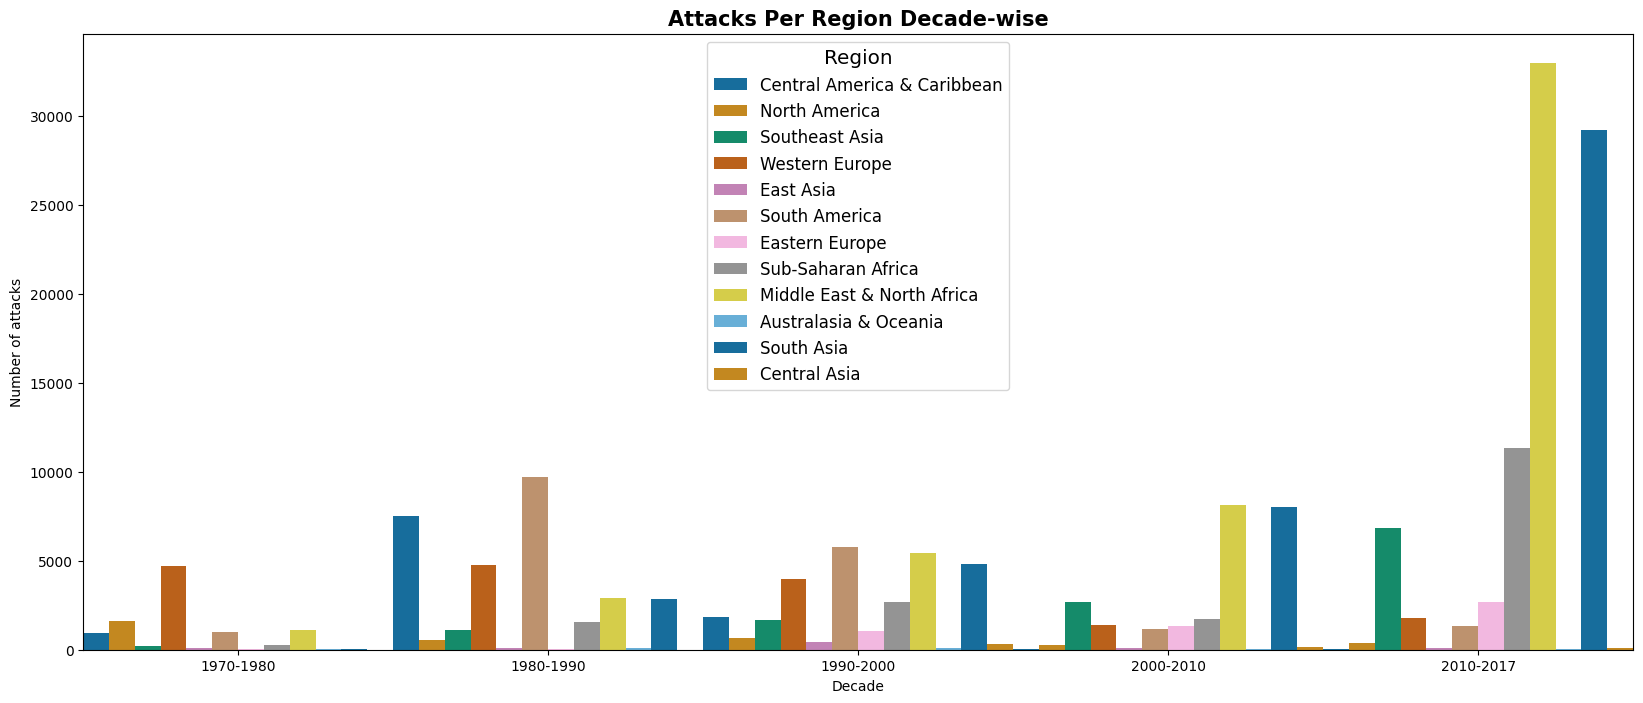

In [26]:
plt.figure(figsize = (20,8)) # Set fig size

# Plot countplot with decade column divide bars by region
ax=sns.countplot(x='decade', data=df, hue='Region', width = 1, palette='colorblind')

plt.ylabel('Number of attacks')
plt.xlabel('Decade')

# Set title and legend
plt.title('Attacks Per Region Decade-wise', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center',
    fontsize='large',
    title='Region',
    title_fontsize='x-large')

plt.show()

##### 1. Why did you pick the specific chart?

This chart helps us to visualize how much terrorist attacks have progressed in each region in the last 5 decades. It aids in which regions were most affected in a specific decade.

##### 2. What is/are the insight(s) found from the chart?

*   During 1970-1980s, terrorist attacks were less than 5000 in every region. Western Europe was the most affected region.
*   During 1980-1990s, attacks increased in almost every region especially in Central America & Caribbean, South American and South Asian regions.
*  During 1990-2000s, Western Europe, South America, Middle East & North Africa were top targets of terrorist attacks
*   During 2000-2010s, Middle East and South Asia were the hotspots.
*   During 2010-2017, Sub Saharan Africa came to top after Middle East & North African and South Asian regions.

*   Central America & Caribbean region was mostly affected between 1970-2000 with most number of attacks in decade 1980-1990s.
*   North America has always seen less attacks.
*   Southeast Asia and Subsaharan African, although less attacks, but has a linear increase with most attacks between 2010-2017.
*   Middle East & North African region and South Asian regions are the most worrisome regions overall.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Regions with a persistent or increasing trend of attacks over decades might deter market entry or expansion. Businesses might avoid investing in or operating within these regions due to perceived higher risks, limiting growth opportunities.

# **Chart - 6: Suicide Attacks**

In [40]:
# Top Countries with Most Suicide Terrorist attacks with their count of attacks
s=df[df['suicide']==1].groupby('Country')['eventid'].count().sort_values(ascending=False)[0:6]

# Grouping rest of the countries and calling them others and calculating the sum of number of suicide attacks
others=df[df['suicide']==1].groupby('Country')['eventid'].count().sort_values(ascending=False)[6:].sum()

In [41]:
# Create a dataframe from above data
new_frame=pd.DataFrame({'Country':s.index,'SuicideAttacks':s.values}, index=None)
new_frame.loc[len(new_frame.index)] = ['Other', others]
new_frame

,Country,SuicideAttacks
0,Iraq,2602
1,Afghanistan,1228
2,Pakistan,511
3,Nigeria,389
4,Syria,344
5,Yemen,220
6,Other,1339


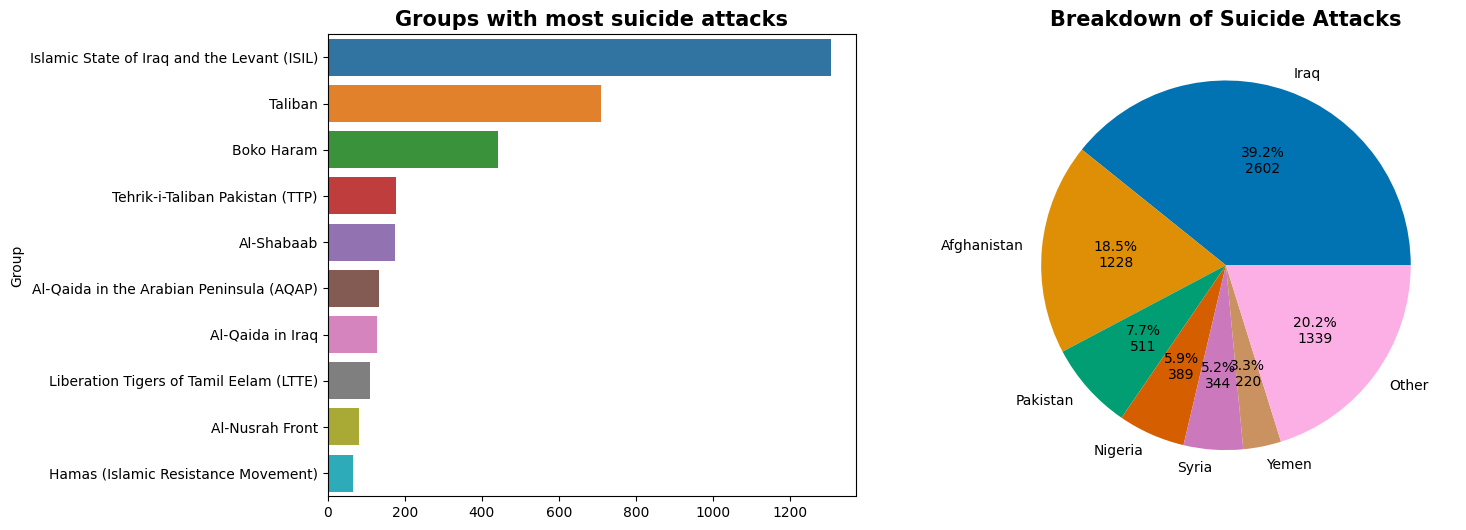

In [102]:
# Plot 1x2 grid for plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6)) #ax1,ax2 refer to your two pies

# Set Palette Color for plot
palette_color = sns.color_palette('colorblind')

# Show % and number of attacks in pieplot
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

# # Plot countplot
# sns.countplot(data=df, x='suicide', ax=ax1, width=0.3)
# ax1.set_title("Suicide Attacks", fontsize=15, fontweight='bold')

#Groups with most number of suicide attacks
new=df[df['suicide']==1].groupby('Group')['eventid'].count().sort_values(ascending=False)[1:11]
#Plot bar
sns.barplot(y=new.index, x=new.values,width=0.8, orient='h', ax=ax1)
ax1.set_title("Groups with most suicide attacks", fontsize=15, fontweight='bold')

# Plot Pie
labels = new_frame['Country']
values = new_frame['SuicideAttacks']
total=sum(values)
ax2.pie(values,labels = labels,colors = palette_color,autopct = fmt)
ax2.set_title("Breakdown of Suicide Attacks", fontsize=15, fontweight='bold')



plt.show()



##### 1. Why did you pick the specific chart?

The barplot shows there are very less suicide attacks in terms of terrorist attacks. The pie chart shows breakdown of suicide attacks by countries. By this we can clearly see which country has most number of suicide attacks.

##### 2. What is/are the insight(s) found from the chart?

Iraq has the highest number of suicide attacks followed by Afghanistan and Pakistan.
Religious extremism or adherence to a particular ideology might drive individuals or groups to carry out suicide attacks.
Various extremist organizations, have been active in Iraq. These groups have used suicide attacks as a tactic to assert control, spread fear, and further their ideological agendas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no direct relationship between suicide attacks and businesses.

# **Chart - 7 : Number of People Killed and Wounded Per Decade**

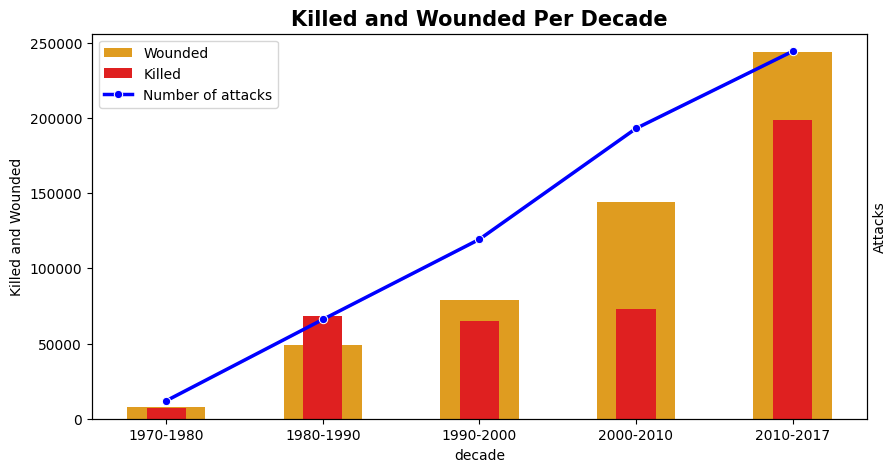

In [103]:
#Group dataframe by decade and create a new dataframe with decade, sum  of killed and wounded per decade
new_frame=df.groupby('decade')[['Killed','Wounded']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))
width=0.5
bar_plot1 = sns.barplot(x='decade', y='Wounded',width=width, data=new_frame, label="Wounded", color="orange", ax=ax1)
bar_plot2= sns.barplot(x='decade', y='Killed',width=0.5*width, data=new_frame,label="Killed", color="red",ax=ax1)

# Secondary y-axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(x='decade', y='eventid', data=df, marker='o', linewidth=2.5, color='blue', ax=ax2, label='Number of attacks') # Number of attacks over time
ax2.set_yticks([])
# Set labels and title
ax1.set_ylabel('Killed and Wounded')
ax2.set_ylabel('Attacks')
plt.xlabel('Decade')
plt.xticks(rotation = 0)
plt.title('Killed and Wounded Per Decade', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()


##### 1. Why did you pick the specific chart?

This chart clubs Killed and Wounded people per decade in a single chart. It also shows the increase in number of attacks linearly.

##### 2. What is/are the insight(s) found from the chart?

There has been increase in the number of people wounded and killed in every decade. From 2010-2017, i.e, in 7 years, approx 200000 have died in terrorist attacks all over the globe and more than 200000 were wounded.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses suffer when they lose their employees and customers in attacks which in turn is bad for the world economy.

#### Chart - 7

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

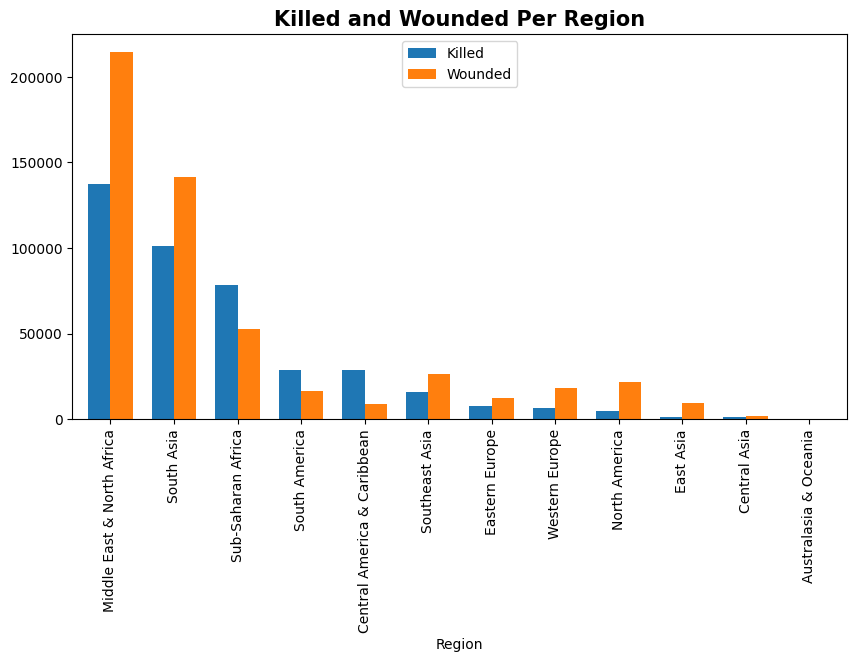

In [29]:
plt.figure(figsize = (20,8))
new_frame=df.groupby('Region')[['Killed','Wounded']].sum().sort_values(['Killed','Wounded'],ascending=False).reset_index()
new_frame.plot(x="Region", y=["Killed", "Wounded"], kind="bar", width=0.7)
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.title('Killed and Wounded Per Region', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')
plt.show

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High-risk environments might pose challenges in recruiting and retaining talent. Employees might be reluctant to work in or relocate to areas perceived as unsafe, impacting staffing and expertise within the organization.

#### Chart - 8

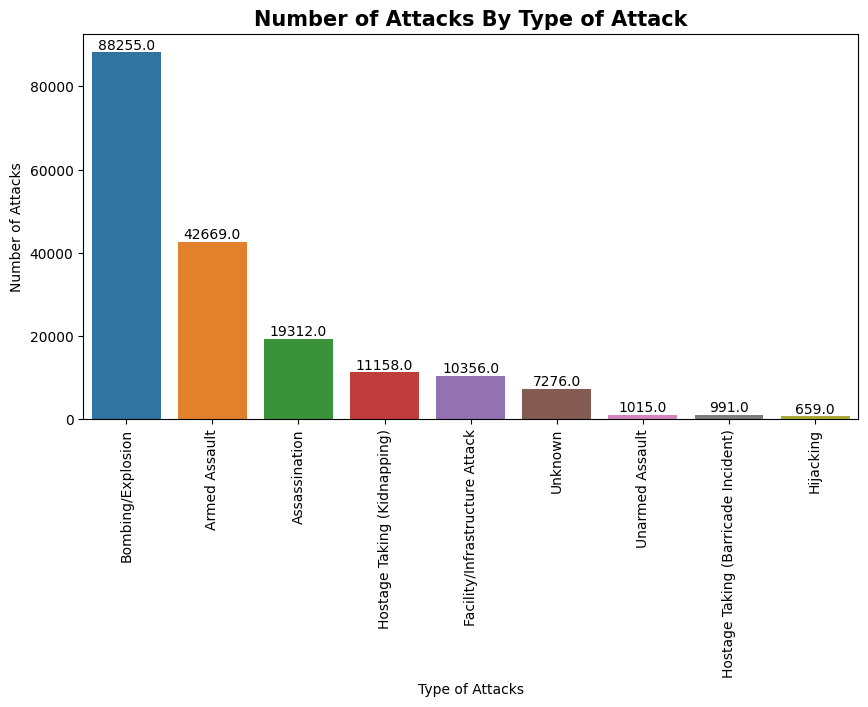

In [179]:
# Chart - 8 visualization code
#Attack Type
ax=sns.countplot(data=df,x='Attack_Type',order=df['Attack_Type'].value_counts()[:].index)
plt.title('Number of Attacks By Type of Attack', fontsize=15, fontweight='bold')
plt.ylabel('Number of Attacks')
plt.xlabel("Type of Attacks")
plt.xticks(rotation=90)

# Displaying count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

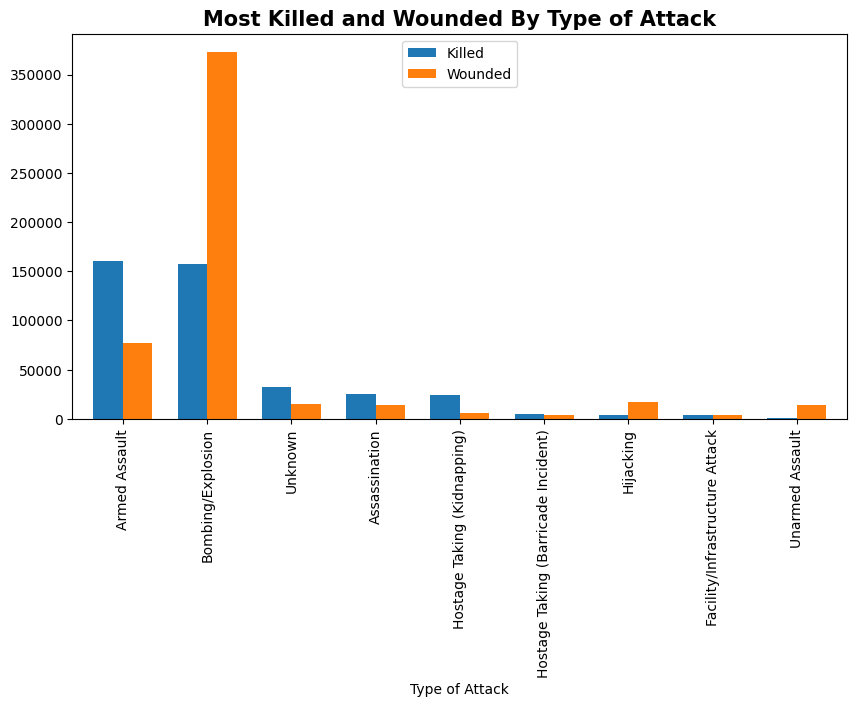

In [31]:
# Chart - 9 visualization code
plt.figure(figsize = (20,8))
new_frame=df.groupby('Attack_Type')[['Killed','Wounded']].sum().sort_values(['Killed','Wounded'],ascending=False).reset_index()
new_frame.plot(x="Attack_Type", y=["Killed", "Wounded"], kind="bar", width=0.7)
plt.xlabel('Type of Attack')
plt.xticks(rotation = 90)
plt.title('Most Killed and Wounded By Type of Attack', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')
plt.show


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [32]:
others=df.groupby('Weapon_Type')['eventid'].count().sort_values(ascending=False)[5:].sum()
s=df.groupby('Weapon_Type')['eventid'].count().sort_values(ascending=False)[0:5]
new_frame=pd.DataFrame({'Weapon': s.index, 'Attacks':s.values})
new_frame.loc[len(new_frame.index) ] = ['Other', others]
new_frame

,Weapon,Attacks
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Other,794


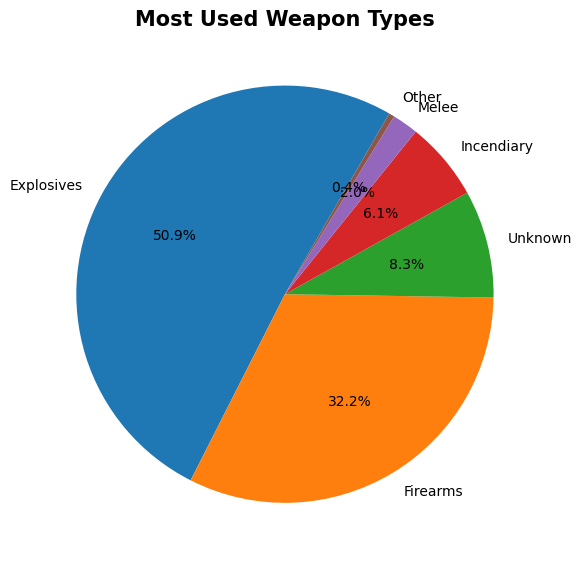

In [33]:
# Chart - 10 visualization code
#Weapon Type
labels = new_frame['Weapon']
values = new_frame['Attacks']

# Creating a pie chart
plt.figure(figsize=(6, 5))
plt.pie(values, labels=labels, autopct='%0.1f%%', startangle=60)

plt.title('Most Used Weapon Types', fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
#df.to_csv('new_df.csv', index=False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

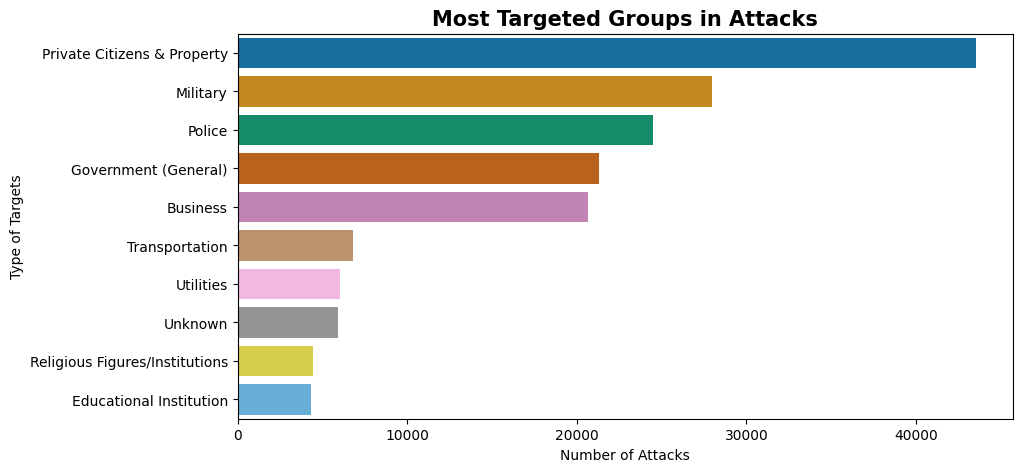

In [34]:
# Chart - 11 visualization code

x=df.groupby("Target_Type")['eventid'].count().sort_values(ascending=False)[0:10]
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Type of Targets')
plt.xlabel('Number of Attacks')
plt.title('Most Targeted Groups in Attacks', fontsize=15, fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

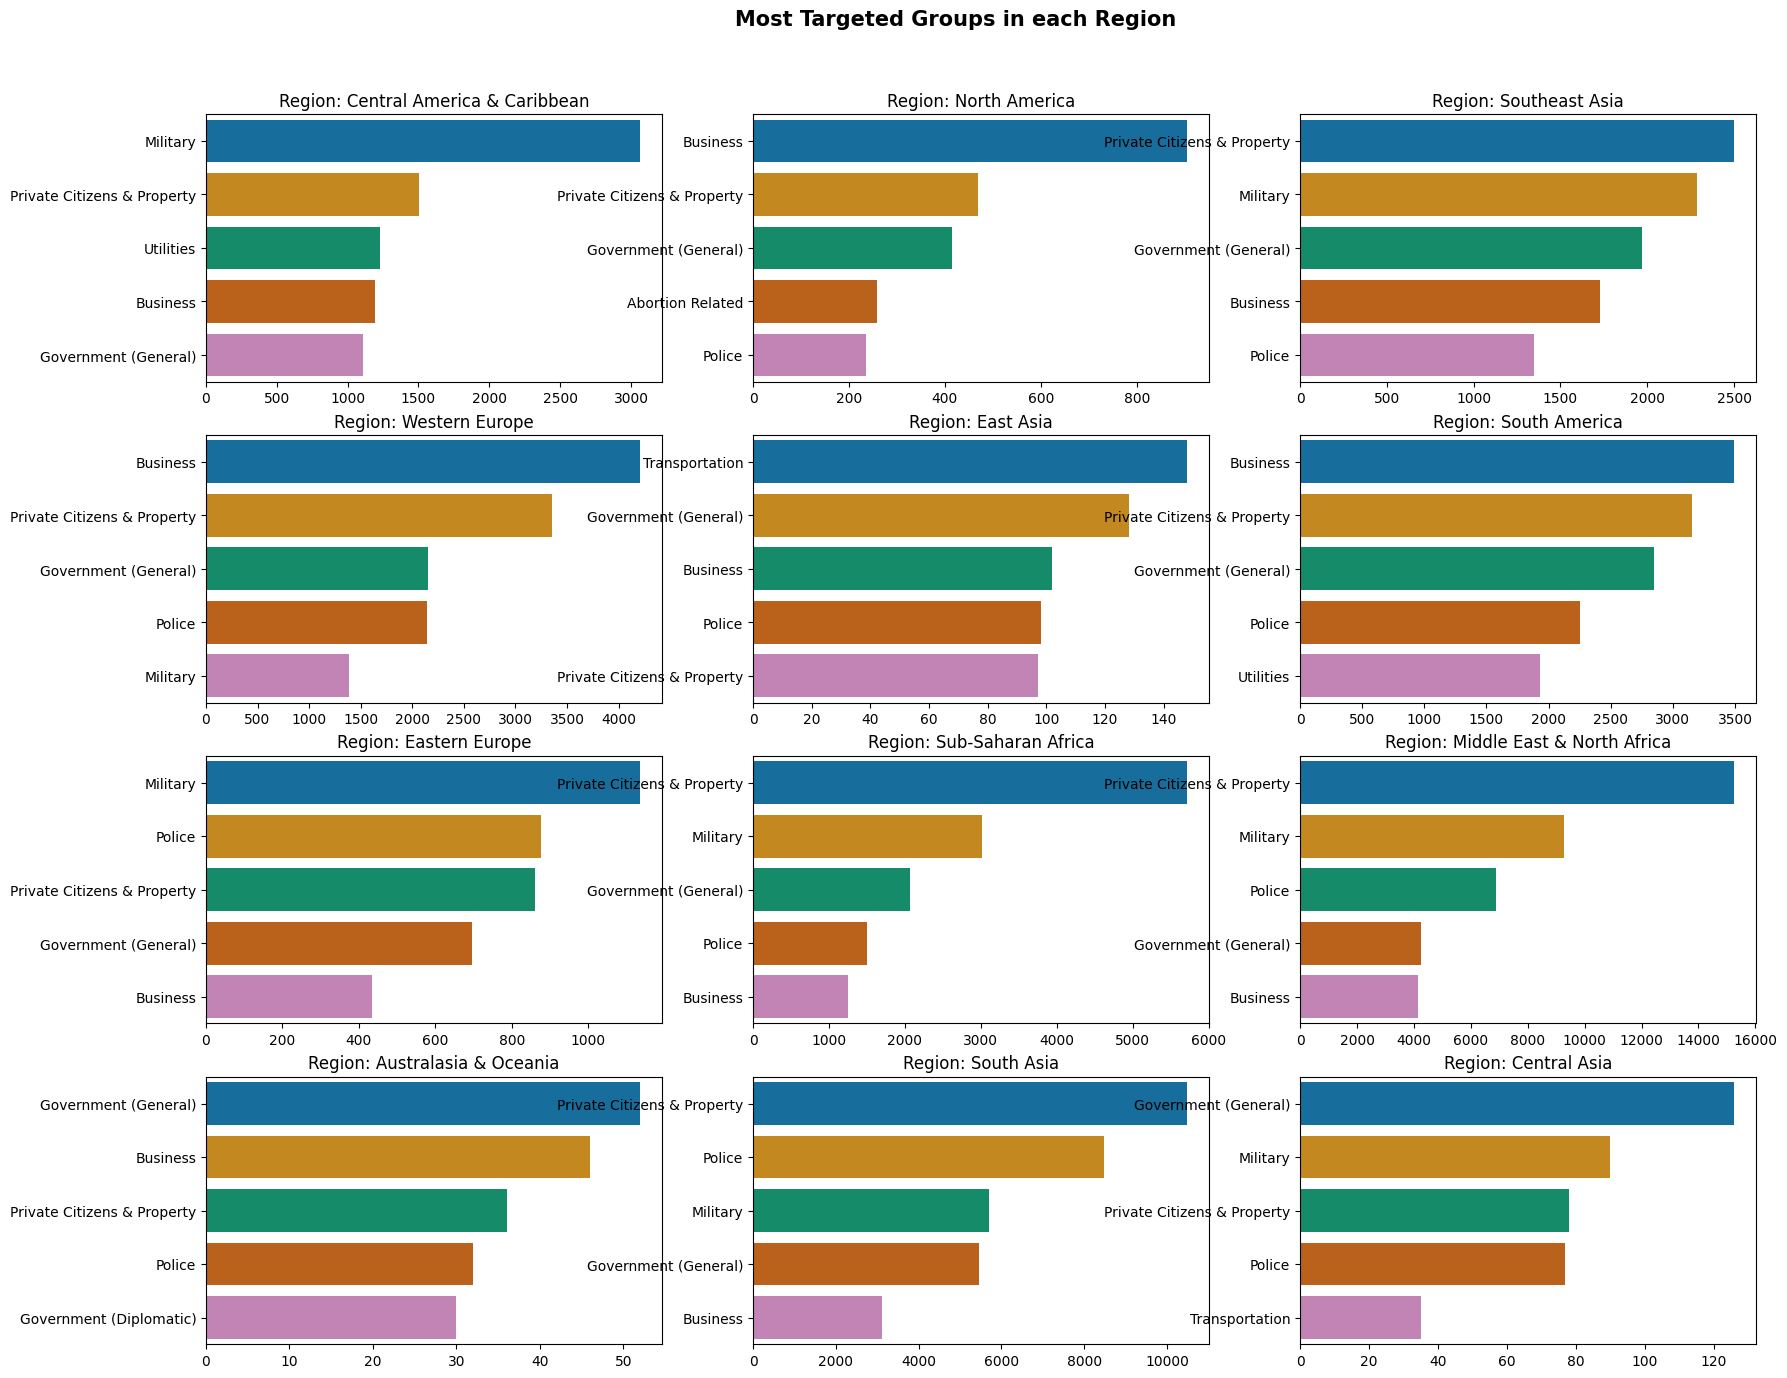

In [35]:
# Chart - 12 visualization code
fig, axes = plt.subplots(4, 3, figsize=(20,15))
fig.subplots_adjust(top=0.93)
plt.suptitle("Most Targeted Groups in each Region",  fontsize = 15, fontweight="bold",y=1)
i=0
j=0
flag=0
for value in df['Region'].unique():
  x=df[df['Region']==value].groupby('Target_Type')['eventid'].count().sort_values(ascending=False)[0:5]
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Region: {}'.format(value),ylabel=None)
  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0

plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

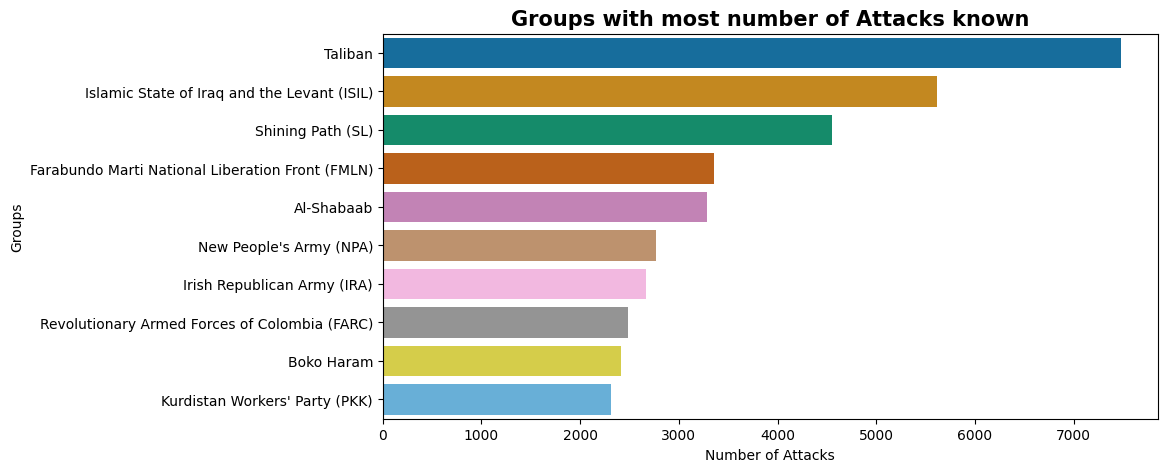

In [36]:
# Chart - 13 visualization code
#Groups
x=df.groupby("Group")['eventid'].count().sort_values(ascending=False)[1:11]
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Groups')
plt.xlabel('Number of Attacks')
plt.title('Groups with most number of Attacks known', fontsize=15, fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

In [37]:
#Most targeted countries
most_targeted_countries=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:10]
most_targeted_countries.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object', name='Country')

In [38]:
#Finding top active groups in most targeted countries
df[(df['Country']=='Turkey') & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False)[0:6].values

array([2109,  236,   82,   69,   41,   36])

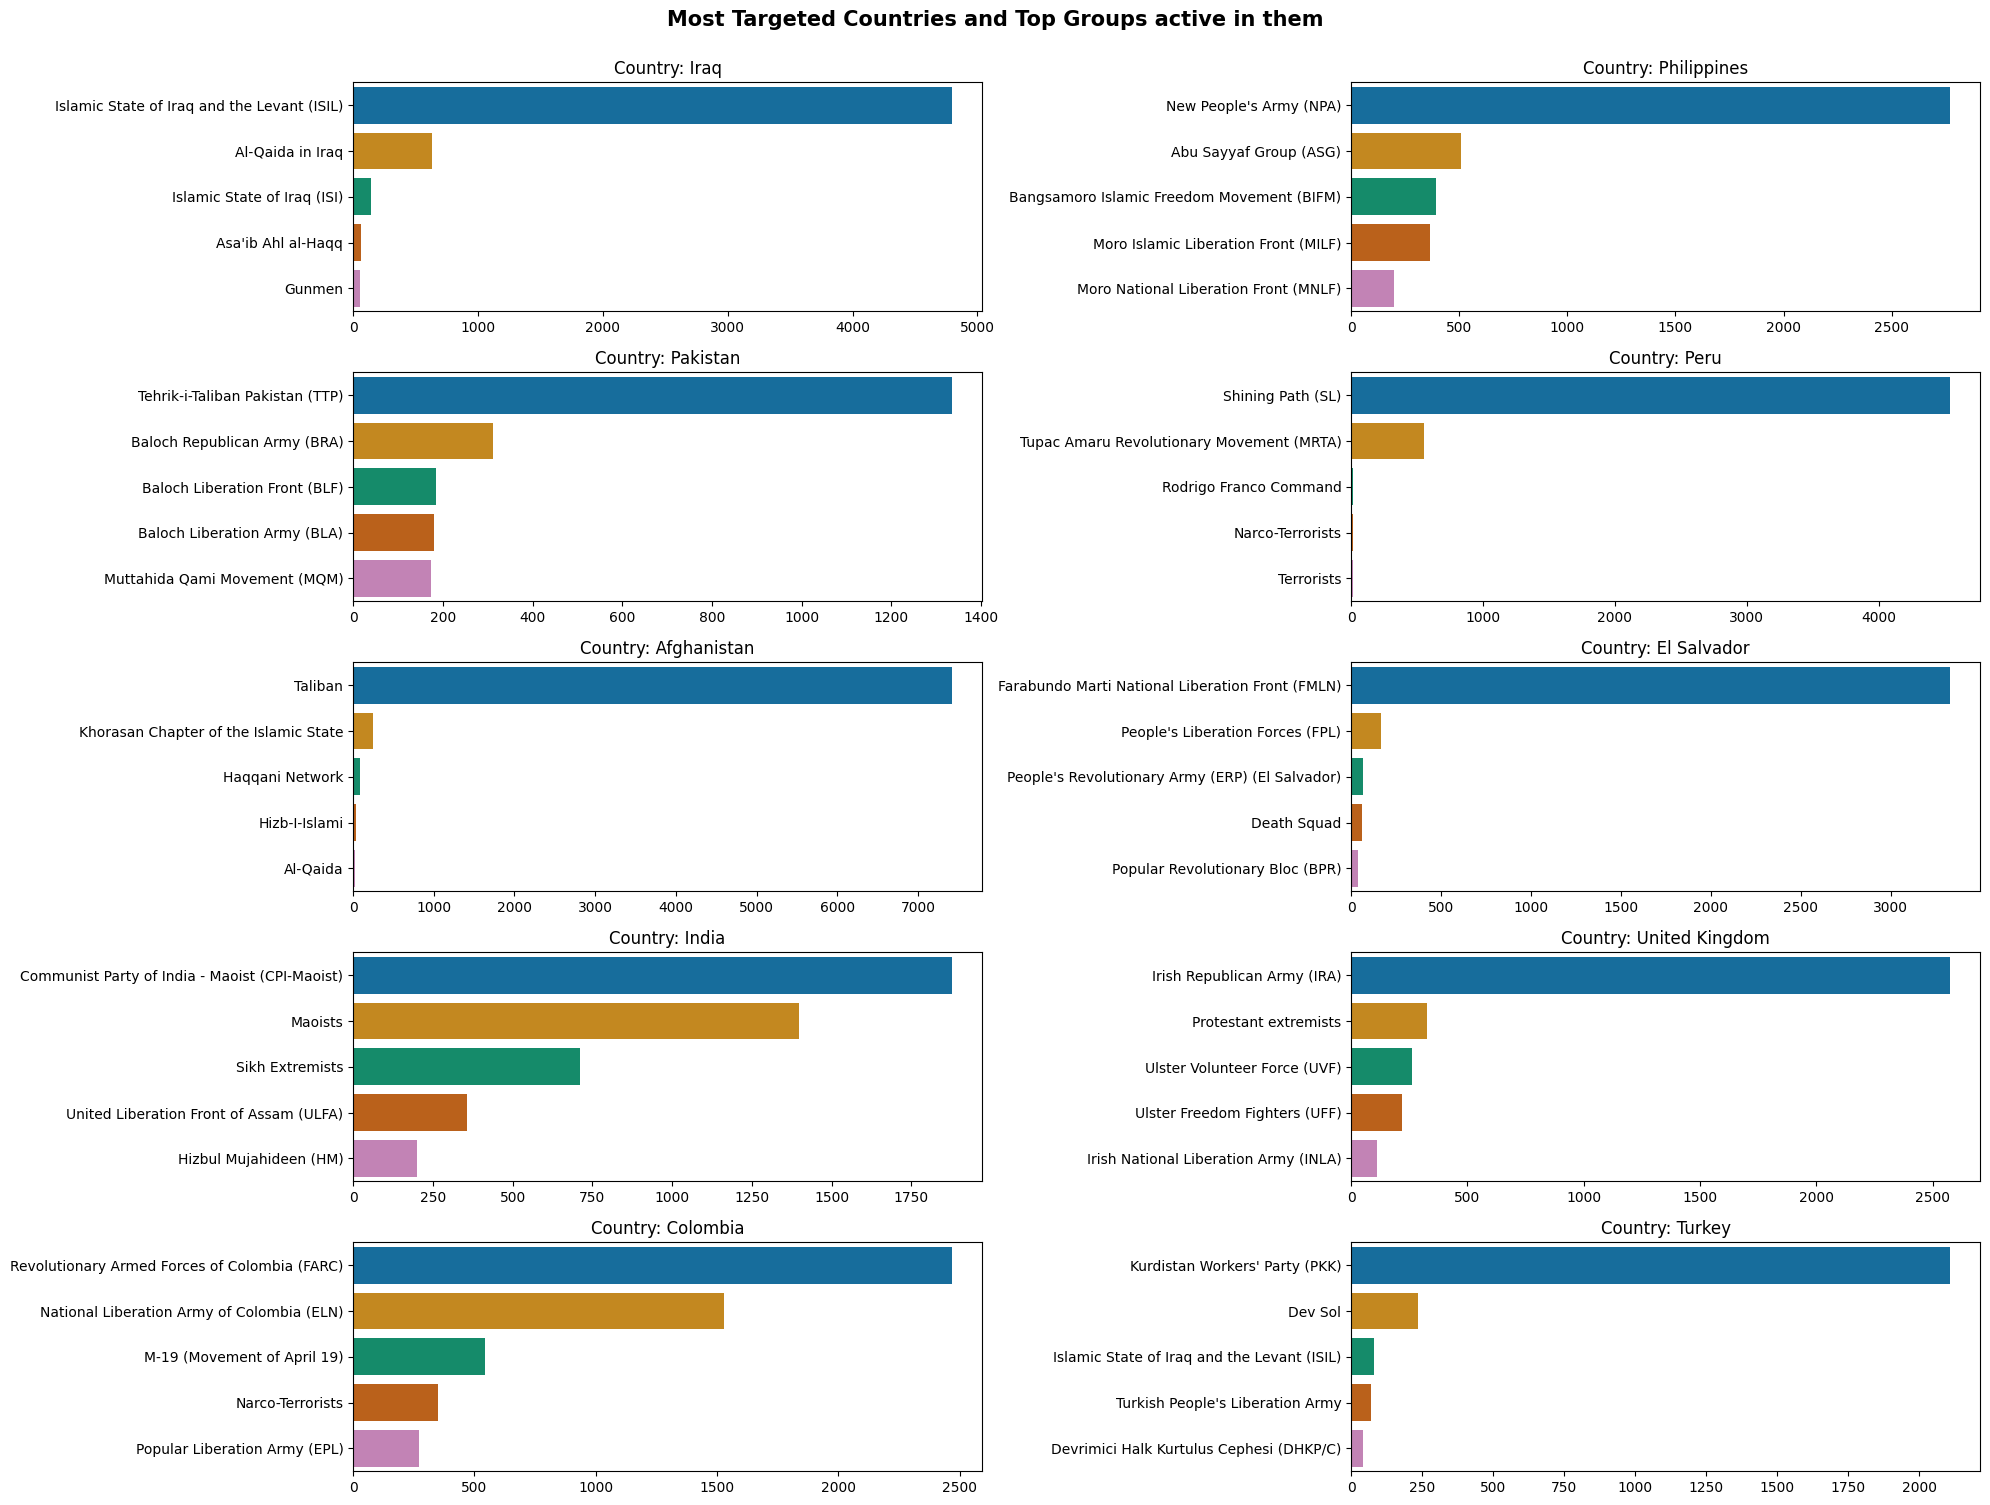

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(20,15))
#fig.subplots_adjust(top=)

plt.suptitle("Most Targeted Countries and Top Groups active in them",  fontsize = 25, fontweight="bold", y=1)
i=0
j=0
flag=0
for value in most_targeted_countries.index:
  x=df[(df['Country']==value) & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False)[0:5]
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Country: {}'.format(value),ylabel=None)
  i+=1
  flag+=1
  if i>4 and flag<10:
    i=0
    j=1
plt.tight_layout()
plt.show()

#### Chart - 15

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

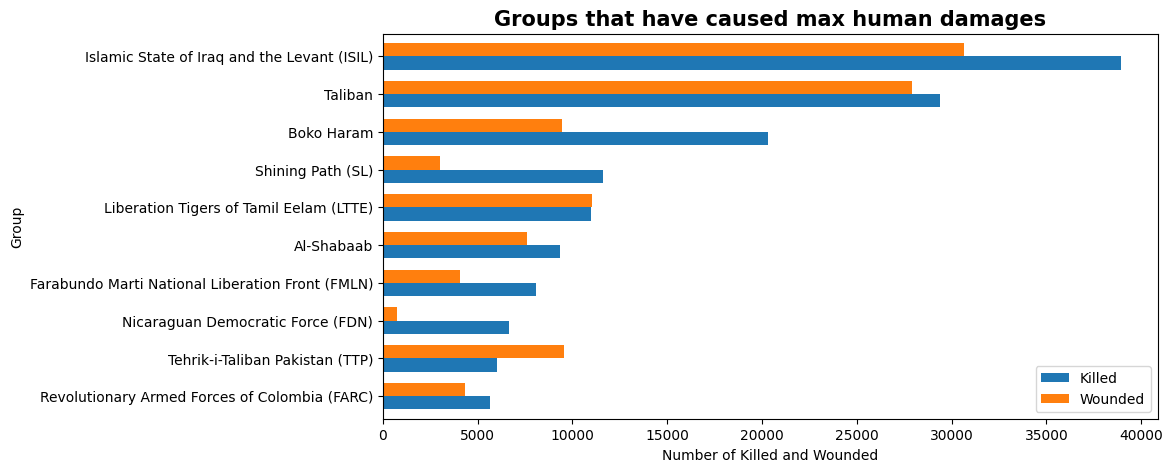

In [39]:
#Killed and Wounded by groups
plt.figure(figsize = (20,8))
new_frame=df[df['Group']!='Unknown'].groupby('Group')[['Killed', 'Wounded']].sum().sort_values(by='Killed', ascending=True)[-10:].reset_index()
new_frame.plot(x="Group", y=["Killed", "Wounded"], kind="barh", width=0.7,)
plt.xlabel('Number of Killed and Wounded')
plt.xticks(rotation =0)
plt.title('Groups that have caused max human damages', fontsize = 15, fontweight="bold")
plt.legend(loc='lower right')
plt.show

#### Chart - 16

In [41]:
#most targeted ountries
most_targeted_countries=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:10]
most_targeted_countries.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object', name='Country')

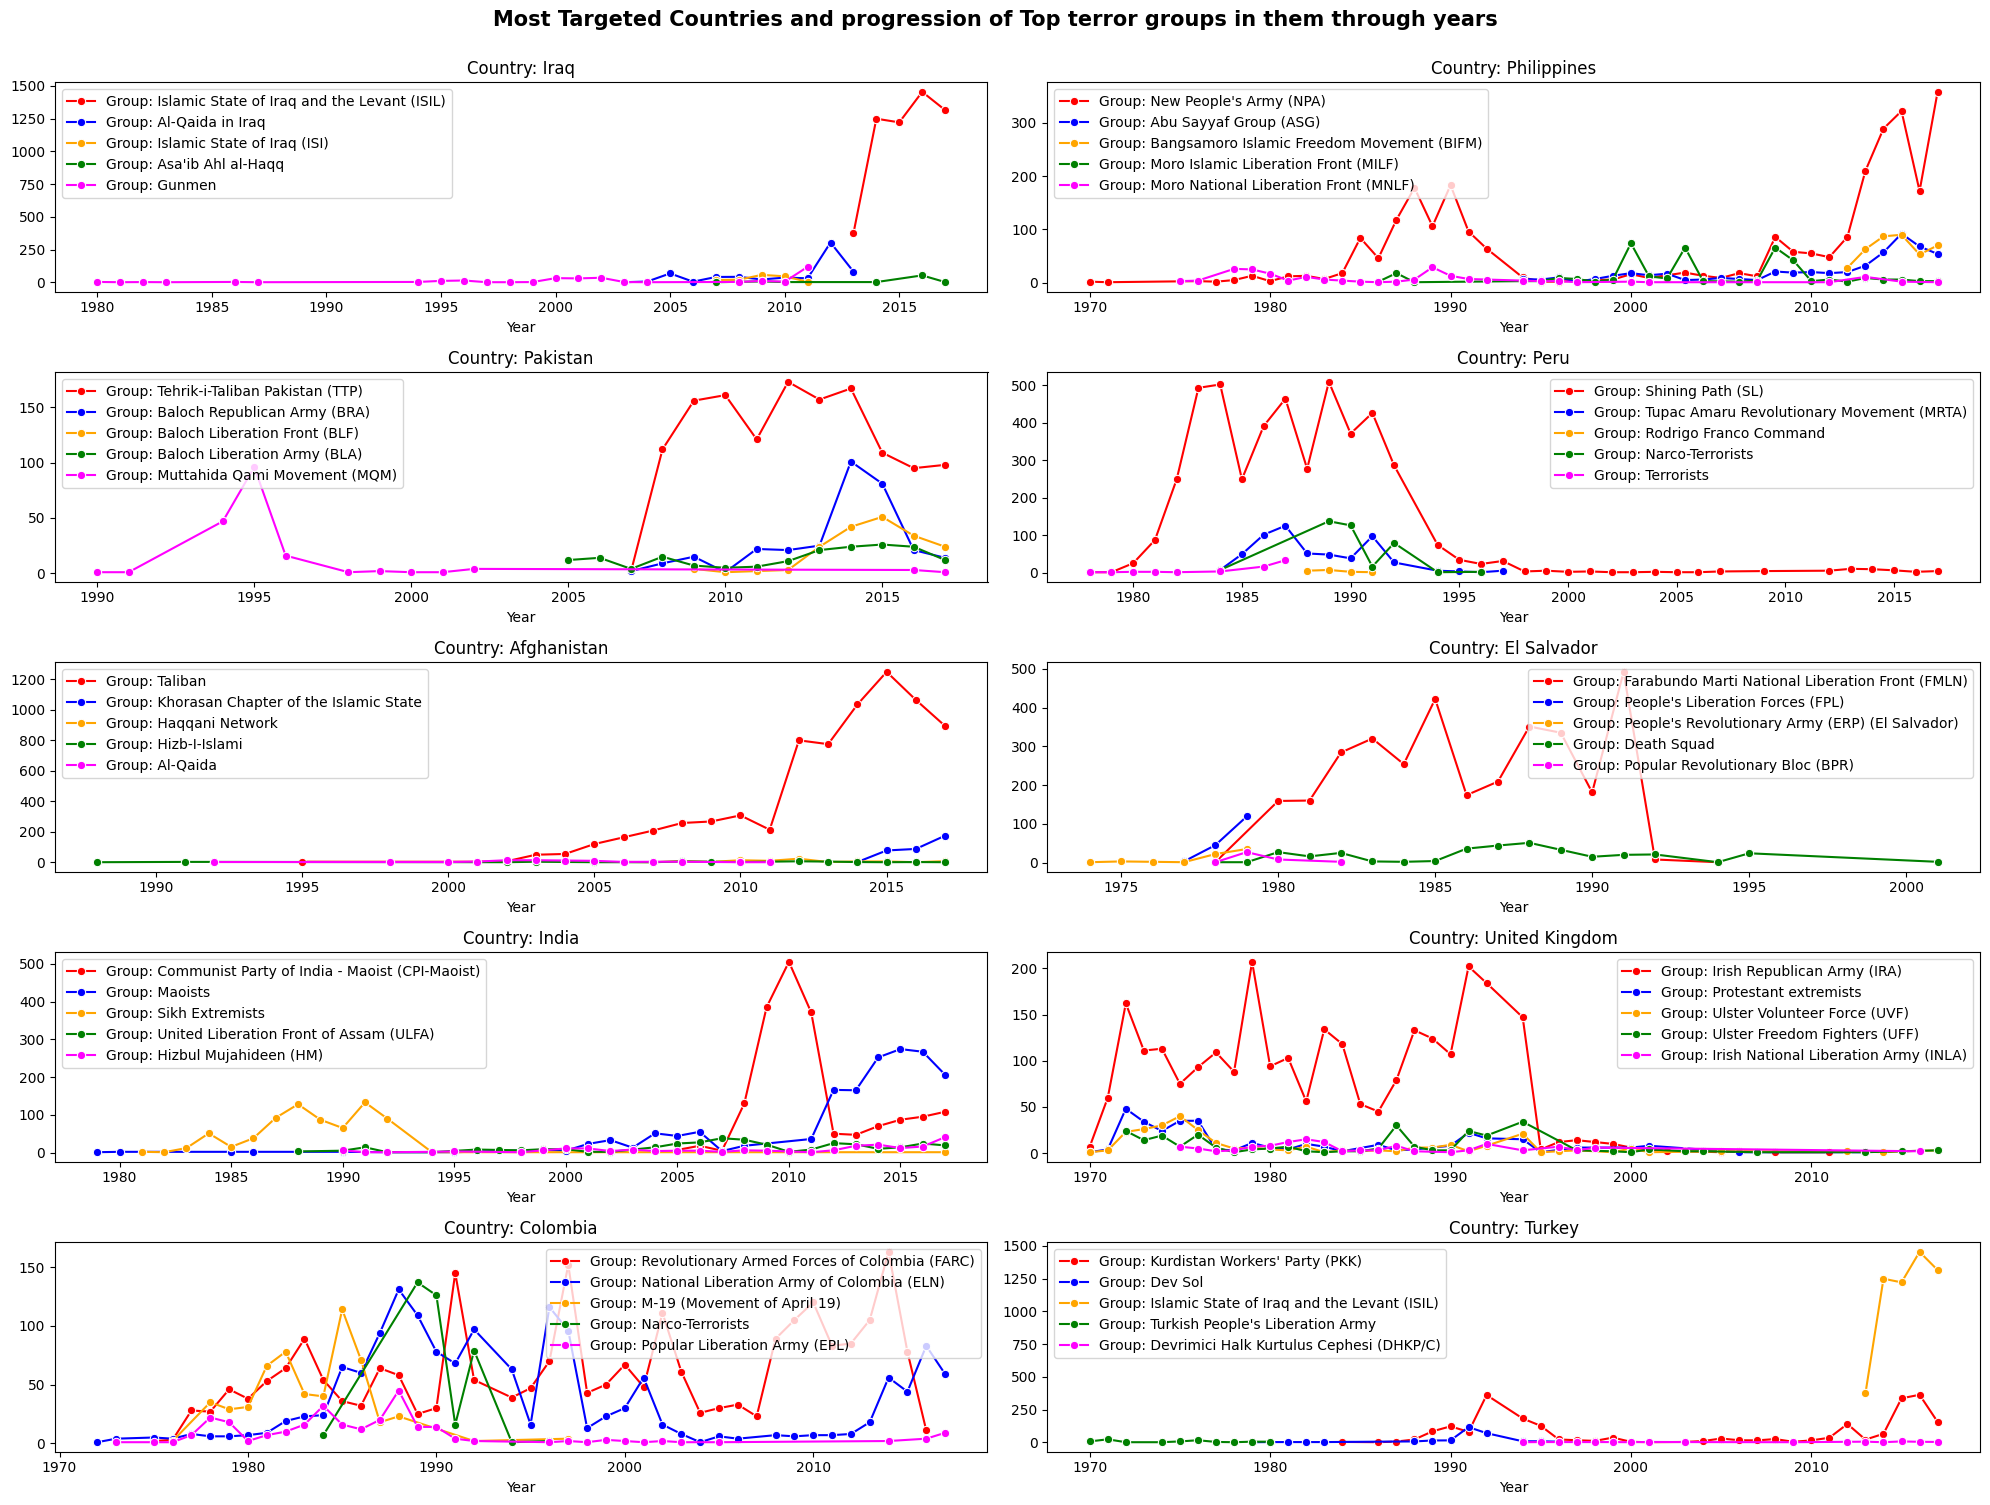

In [42]:
fig, axes = plt.subplots(5, 2, figsize=(20,15))
fig.subplots_adjust(top=0.95)

plt.suptitle("Most Targeted Countries and progression of Top terror groups in them through years",  fontsize = 15, fontweight="bold",y=1)
i=0
j=0
flag=0

for value in most_targeted_countries.index:
  groups=df[(df['Country']==value) & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False).index[0:5]

  for c,group in enumerate(groups):
    colors=['red','blue','orange','green','magenta']
    s=df[df['Group']==group].groupby('Year')['eventid'].count()
    new_frame=pd.DataFrame({'Year':s.index,'Attacks':s.values})
    ax=sns.lineplot(data=new_frame,x='Year', y='Attacks', marker='o', linestyle='-', color=colors[c], label='Group: {}'.format(group),ax=axes[i,j]).set(title='Country: {}'.format(value),ylabel=None)
  i+=1
  flag+=1
  if i>4 and flag<10:
    i=0
    j=1
plt.tight_layout()
plt.show()

#### Chart - 17

In [74]:
#pip install squarify

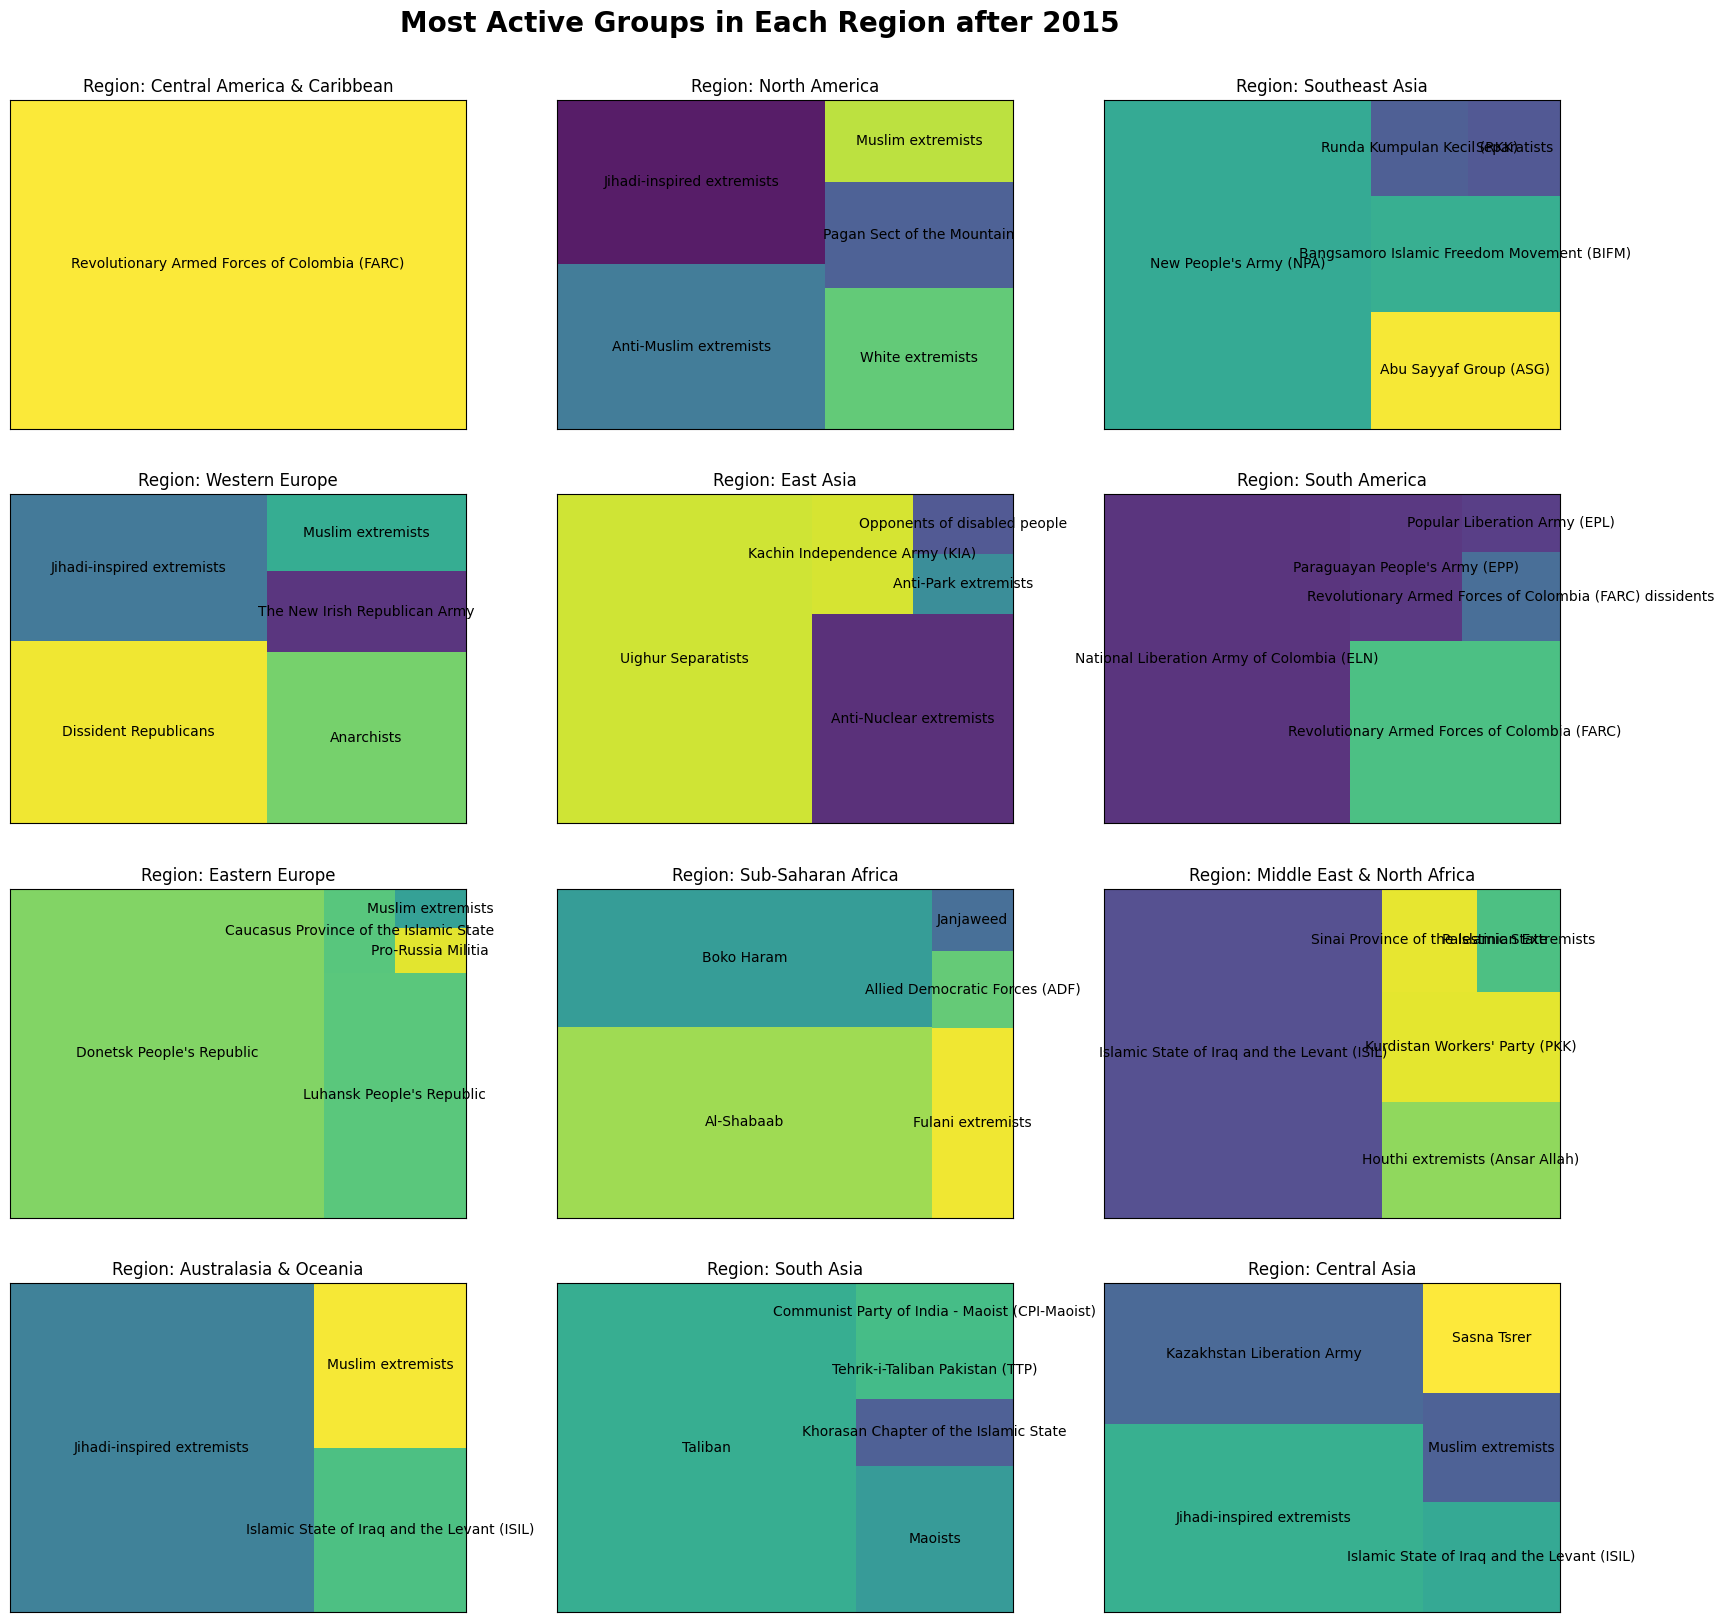

In [175]:
import squarify
fig, axes = plt.subplots(4, 3, figsize=(20,18))
fig.subplots_adjust(top=0.95)
plt.suptitle("Most Active Groups in Each Region after 2015",  fontsize = 20, fontweight="bold",y=1)
i=0
j=0
flag=0
for value in df['Region'].unique():
  x=df[(df['Year']>=2015) & (df['Region']==value) & (df['Group']!='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False)[0:5]
  sizes=x.values.tolist()
  labels=x.index.tolist()
  #ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Region: {}'.format(value),ylabel=None)
  ax=squarify.plot(sizes=sizes, label=labels, alpha=.9, ax=axes[i,j]).set(title='Region: {}'.format(value),ylabel=None,xticks=[],yticks=[])

  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0
plt.show()

#### Chart - 15

In [139]:
#Top groups active after 2015 and there top target countries
top_groups=df[df['Year']>=2015].groupby('Group')['eventid'].count().sort_values(ascending=False)[1:11].index.tolist()

In [143]:
group_countries={}
for group in top_groups:
  group_countries[group]=df[(df['Year']>=2015) & (df['Group']==group)]["Country"].unique().tolist()
group_countries

{'Islamic State of Iraq and the Levant (ISIL)': ['Iraq',
  'Syria',
  'Saudi Arabia',
  'Lebanon',
  'West Bank and Gaza Strip',
  'Turkey',
  'France',
  'Bahrain',
  'Jordan',
  'Somalia',
  'Germany',
  'Tunisia',
  'Yemen',
  'Belgium',
  'Philippines',
  'Malaysia',
  'Indonesia',
  'Russia',
  'Georgia',
  'United Kingdom',
  'Iran',
  'Australia'],
 'Taliban': ['Afghanistan', 'Pakistan'],
 'Al-Shabaab': ['Kenya', 'Somalia', 'Tanzania', 'Uganda'],
 'Boko Haram': ['Nigeria',
  'Cameroon',
  'Niger',
  'Chad',
  'Burkina Faso',
  'Mali'],
 'Houthi extremists (Ansar Allah)': ['Yemen', 'Saudi Arabia'],
 "Kurdistan Workers' Party (PKK)": ['Turkey',
  'Germany',
  'Iraq',
  'Netherlands',
  'Austria',
  'United Kingdom',
  'Syria',
  'Iran'],
 "New People's Army (NPA)": ['Philippines'],
 'Maoists': ['India', 'Nepal'],
 'Sinai Province of the Islamic State': ['Egypt',
  'Israel',
  'West Bank and Gaza Strip'],
 'Palestinian Extremists': ['Israel',
  'West Bank and Gaza Strip',
  'Nether

<ipython-input-174-8556e0db5bed>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


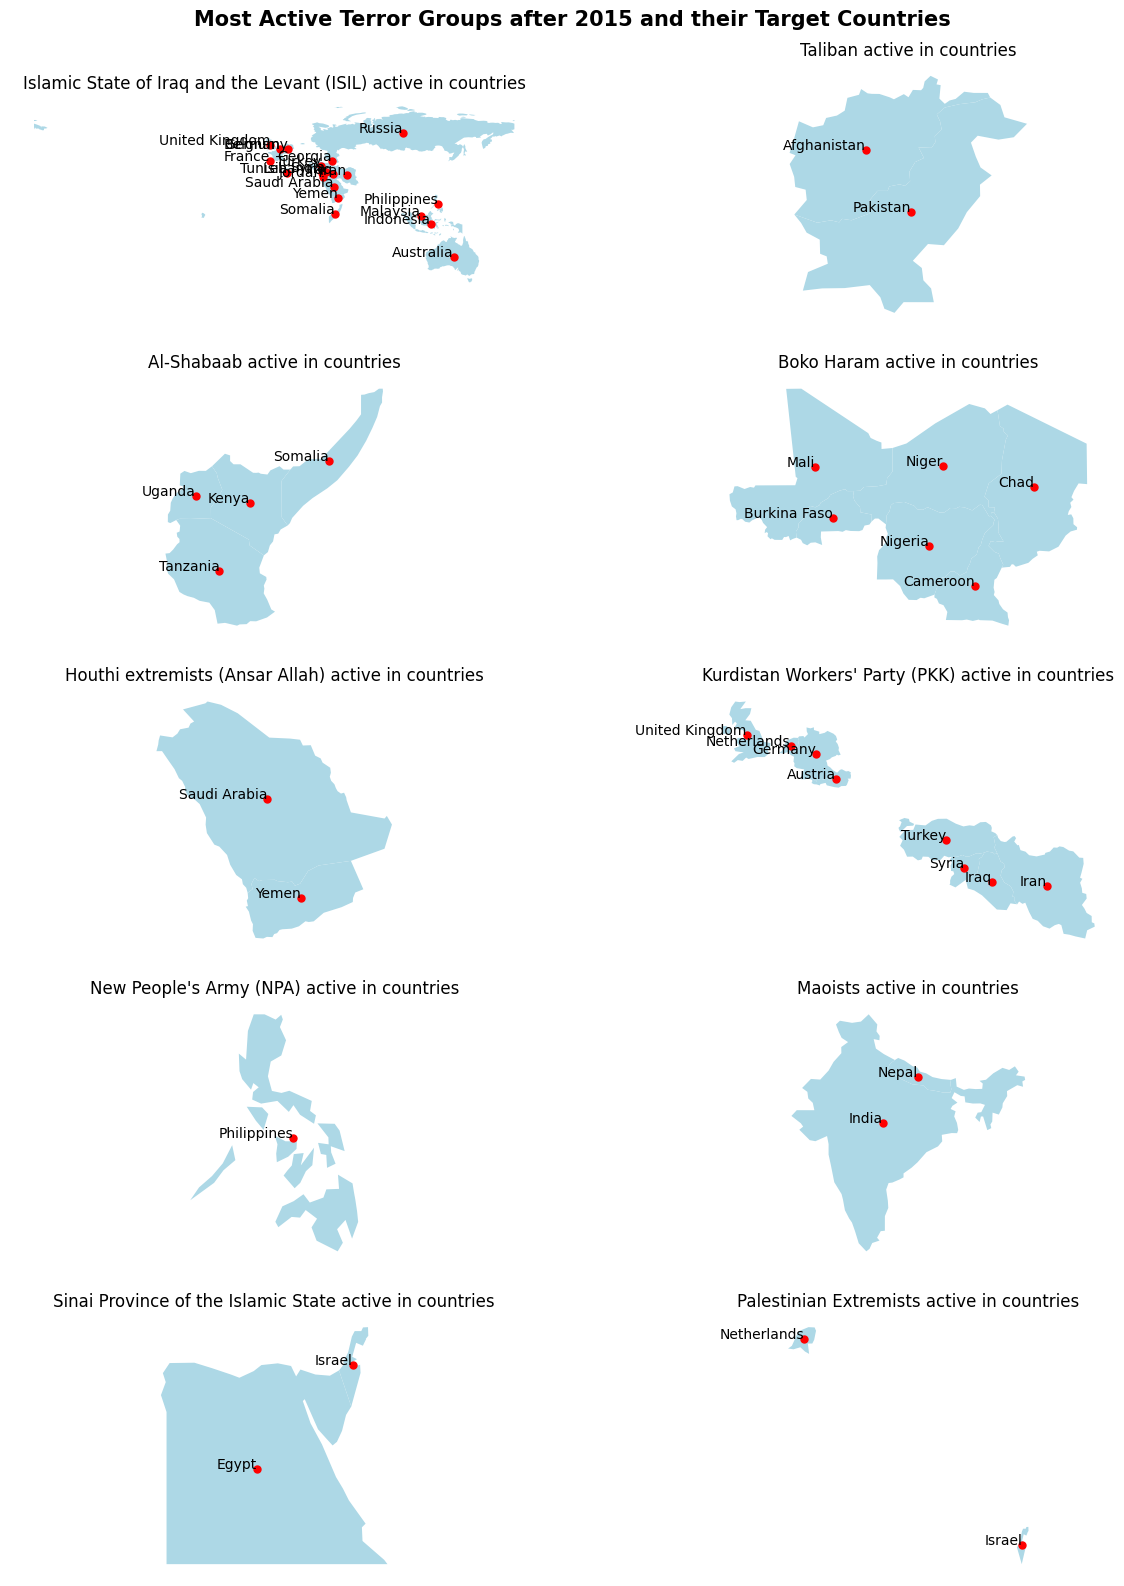

In [174]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a 5x2 grid of subplots for maps
fig, axs = plt.subplots(5, 2, figsize=(15, 18))
fig.suptitle("Most Active Terror Groups after 2015 and their Target Countries", fontweight='bold', fontsize=15)
fig.subplots_adjust(top=0.95)

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        index = i * 2 + j
        if index < len(group_countries):
            group_names = list(group_countries.keys())
            group = group_names[index]
            countries = group_countries[group]
            group_map = world[world['name'].isin(countries)]

            # Plot the world map
            group_map.plot(ax=ax, color='lightblue')

            # Plot centroids as points for countries in the current group
            for idx, country in group_map.iterrows():
                centroid = country['geometry'].centroid
                ax.plot(centroid.x, centroid.y, 'o', color='red', markersize=5)
                ax.text(centroid.x, centroid.y, country['name'], fontsize=10, ha='right', va='baseline')

            ax.set_title(f'{group} active in countries')
            ax.axis('off')

plt.show()



#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***